# Doublet

In [6]:
from IPython.core.display import HTML
def css_styling(filepath):
    styles = open(filepath, 'r').read()
    return HTML(styles)
css_styling('../styles/custom.css');

In [7]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

A doublet is basically a combination of a source and a sink. In the previous lesson notebook a source-sink pair was studied when added to a uniform flow, generating the so-called Rankine oval.

Let's assume that the source-sink is isolated from the uniform flow, so the streamline function reads

$$\psi(x, y) = \frac{\sigma}{2\pi} (\theta_1 - \theta_2) = \frac{\sigma}{2\pi} \Delta\theta,$$

with $\theta_1$ and $\theta_2$ the azimuthal coordinates of either the source or the sink, respectively. They will be located at $\left(-l/2, 0 \right)$ and $\left(l/2, 0 \right)$.

Given a point $P(x, y)$ and the distance between the singularities $l$, the streamfunction can be considered to satisfy the following conditions,

$$\psi(x, y) = \lim \limits_{l \to 0} \left(-\frac{\sigma}{2\pi}d\theta\right), \quad \text{with} \quad \sigma l = \text{constant}.$$

From geometrical relations, one can express the value of the infinitessimal angle $d\theta$ assuming neglegible distance betwen both singalurities, i.e.

$$d\theta = \frac{a}{b} = \frac{l\sin\theta}{r - l\cos\theta}.$$

This yields to the doublet streamfunction both in cartesian and polar coordinates

$$\psi = -\frac{\kappa}{2\pi} \frac{\sin\theta}{r} = -\frac{\kappa}{2\pi} \frac{y}{x^2 + y^2},$$

from which the velocity field can be derived,

$$u = \frac{\partial\psi}{\partial y} =-\frac{\kappa}{2\pi} \frac{x - y}{(x^2 + y^2)^2}$$

$$v = -\frac{\partial\psi}{\partial x} =-\frac{\kappa}{2\pi} \frac{2xy}{(x^2 + y^2)^2},$$

These expressions can also be transtlated to cylindrical coordinates with the definition

$$u_r = \frac{1}{r}\frac{\partial\psi}{\partial\theta} = U_\infty\cos\theta\left(1 - \frac{R}{r^2} \right),$$
$$u_\theta = -\frac{\partial\psi}{\partial r} = -U_\infty\sin\theta \left(1 + \frac{R}{r^2} \right),$$

where the constant $R = \frac{\kappa}{2\pi U_\infty}$, was introduced for simplicity (this will be explained later).

Let's plot some examples

In [8]:
N = 50                                # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -1.0, 1.0            # y-direction boundaries
x = np.linspace(x_start, x_end, N)    # creates a 1D-array for x
y = np.linspace(y_start, y_end, N)    # creates a 1D-array for y
X, Y = np.meshgrid(x, y)              # generates a mesh grid

The strenght of the doublet will be fixed to $\kappa = 1.0$, and it will be located at the origin.

In [9]:
kappa = 1.0
x_doublet, y_doublet = 0.0, 0.0

Similar to what it was done in previous notebooks, a function computing the velocity from a doublet will be defined,

In [10]:
def get_velocity(kappa, x0, y0, X, Y):
    
    u = -kappa/(2*np.pi)*((X - x0)**2 - (Y - y0)**2)/((X - x0)**2 + (Y - y0)**2)**2
    v = -kappa/(2*np.pi)*2*(X - x0)*(Y - y0)/((X - x0)**2 + (Y - y0)**2)**2
    
    return u, v

and the corresponding function to calculate the streamfunction

In [11]:
def get_streamfunction(kappa, x0, y0, X, Y):
    
    psi = -kappa/(2*np.pi)*(Y - y0)/((X - x0)**2 + (Y - y0)**2)
    
    return psi

Once defined these functions, they will be tested with the following computations:

In [12]:
u_doublet, v_doublet = get_velocity(kappa, x_doublet, y_doublet, X, Y)
psi_doublet = get_streamfunction(kappa, x_doublet, y_doublet, X, Y)

A plot will be more explanatory

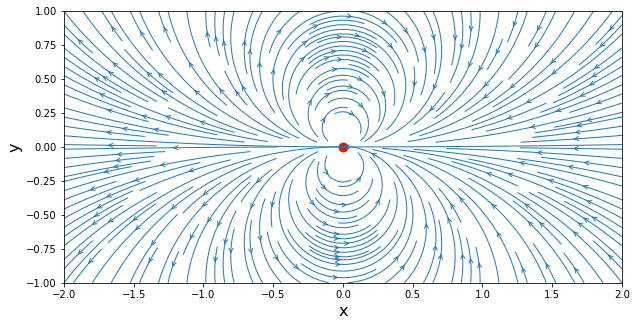

In [13]:
# plot the streamlines
width = 10
height = (y_end - y_start)/(x_end - x_start)*width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_doublet, v_doublet,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o');

## Uniform flow past a doublet

From the previous solution, and taking advantage of the superposition feature of potential flows, the doublet solution will be combined with this of a uniform flow $U_\infty = 1$.

In [14]:
u_inf = 1.0

From the previous lesson, the uniform flow has the following solutions

$$\psi = U_\infty y,$$
$$\phi = U_\infty x.$$

In [15]:
u_freestream = u_inf*np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

psi_freestream = u_inf*Y;

In [16]:
# superposition of the doublet on the freestream flow
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

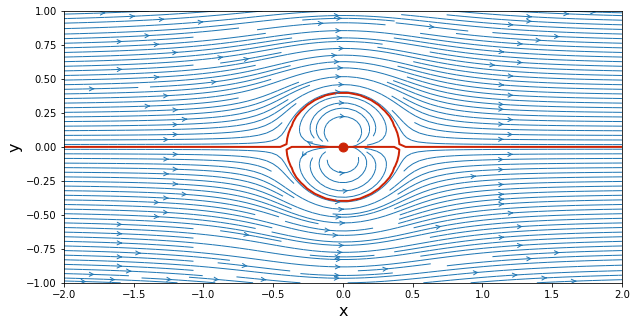

In [17]:
# plot the streamlines
width = 10
height = (y_end - y_start)/(x_end - x_start)*width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
plt.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o');

### Challenge question
What is the radius of the circular cylinder created when a doublet of strength $\kappa$ is added to a uniform flow $U_\infty$ in the $x$-direction?

The answer of this question will be given by the calculation of the stagnation points, because these horizontals will define the radius, as can be seen in the upper chart.

To do that let's impose $u_r = u_\theta = 0$, and by dividing their expressions one gets

$$\tan\theta = \frac{1 + R/r^2}{1 - R/r^2} = 0,$$

so by no means one obtaines the condition

$$r^2 + R \neq 0,$$

leading to

$$\theta = (0,\, \pi),$$

and by inserting this solution onto the $u_r$ equation,

$$r = \sqrt{R} \equiv \sqrt{\frac{\kappa}{2 \pi U_\infty}} \equiv a.$$

In summary, the stagnation points are

$$(r_\text{stagnation}, \theta_\text{stagnation}) = \left\{(0, a), (\pi, a)\right\},$$

or in cartesian coordinates,

$$(x_\text{stagnation}, y_\text{stagnation}) = \left\{(-a, 0), (a,0)\right\},$$

being recognized $a = \sqrt{\frac{\kappa}{2 \pi U_\infty}}$ as the circle radius.

### Challenge task
You have the streamfunction of the doublet in cylindrical coordinates above. Add the streamfunction of the free stream in those coordinates, and study it. You will see that $\psi=0$ at $r=a$ for all values of $\theta$. The line $\psi=0$ represents the circular cylinder of radius $a$. Now write the velocity components in cylindrical coordinates, find the speed of the flow at the surface. What does this tell you?

First, let's get calculated the zero streamfunction from the streamfunction at one of the stagnation points [say the front one, at $(R, \pi)$]

$$\psi_0 = U_\infty r\sin\theta -\frac{\kappa}{2\pi} \frac{\sin\theta}{r} = 0,$$

so the equation for the zero streamline is

$$U_\infty r\sin\theta -\frac{\kappa}{2\pi} \frac{\sin\theta}{r} = 0.$$

From here, one can obtains that

$$r = \sqrt{R} \equiv a,$$

no matter the value of $\theta$.

Next, let's get the velocities calculated in these points,

$$u_r (R, \theta) = 0,$$
$$u_\theta (R, \theta) = -2 U_\infty\sin\theta.$$

This means that the there is no radial velocity around the cylinder surface, and that the azimuthal velocity grows and decays accoding to theta, i.e. at $\theta = 0, \pi$, $u_\theta = 0$ (stagnation points), but the velocity will be contrarily maximum $|u_\theta| = 2 U_\infty$ at $\theta = \pm \pi/2$.

In cartesian coordinates, the velocities can be expresed as

$$u(R, \theta)= 2 U_\infty \sin^2\theta,$$
$$v(R, \theta)= -2 U_\infty \sin\theta \cos\theta.$$



In [24]:
theta = np.arctan2(Y, X)

uu = 2*u_inf*np.sin(theta)**2
vv = -2*u_inf*np.sin(theta)*np.cos(theta)

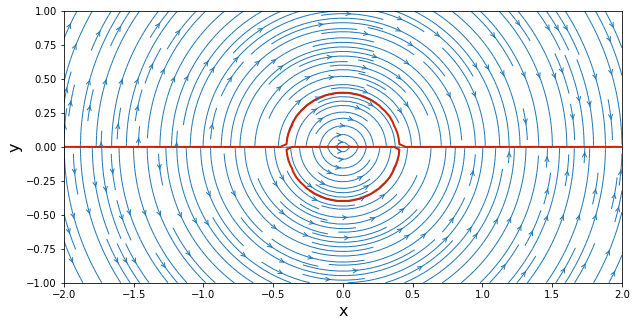

In [27]:
# plot the streamlines
width = 10
height = (y_end - y_start)/(x_end - x_start)*width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, uu, vv,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');